Krishan Kumar Pandey

# Project 2:Investigate a Dataset (TMDb Movie Data)

In this project we are going to do general data analysis of data provided to us with the help of python libraries like numpy,pandas and matplotlib.

# Table of Contents:

1.Introduction

2.Data Wrangling

3.Exploratory Data Analysis

4.Conclusions

# 1.Introduction

### About Dataset:

 In this project I have chosen TMDb movie data set for data analysis process. It has the details of around 10000 movies.
 I will analyse this data set on the basis of few questions.

### Questions:

1. Find the movie name which has highest runtime?

2. How many movies have runtime less than 2hrs.(120 min) and greater than 2hrs ?

3. Year of highest and lowest number of movie release?

4. Get 5 directors with highest directed movies?

5. What is maximum and minimum vote average?

6. Name the movies with maximum and minimum vote average?

7. Movies having vote average less than or equal to 5 and greater than 5?

8. What is the vote average of most popular movie?

9. Find the revenue of highest budget movie?

10. Revenue of Most Popular movie?

In [1]:
#first of all import the required libraries before going on the next phase of data analysis.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# 2.Data Wrangling

In this section i will load in the data, check for cleanliness, and then trim and clean  dataset for analysis.

### General Properties

In [2]:
#loading data(CSV file) using pandas library 
df_tmdb=pd.read_csv("tmdb-movies.csv")

In [3]:
#the sumerized information about dataset
df_tmdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#First 3 rows of the dataset to take a glimpse of dataset.
df_tmdb.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [5]:
#last 3 rows of the dataset
df_tmdb.tail(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [6]:
#there are too many columns and some are hidden
#let's dig out each column.
df_tmdb.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
#the statistical summary of the data 
df_tmdb.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning(Removing Unwanted Data )

First we will look at the missing values in the data set

In [8]:
#to get the missing values in the columns.
df_tmdb.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

we can see that 'homepage ','tagline','overview','production_companies' has very large number of missing values.

#### Steps To Delete Or Modify The dataset

1.Remove the unused columns and rows(if necessary) with missing values.

2.Remove duplicate rows from the dataset.

3.Change format if necessary.

4.Treatment of outliers

#### 1.Remove the unused columns  with missing values.

Since few columns which are not usable in the data analysis process.columns are: imdb_id, keywords, homepage,tagline,overview and budget_adj,revenue_adj has huge number of 0 values so we can drop it. So these are the columns that are not involved in the analysis process.

In [9]:
#removing the unused columns using drop() function.
df_tmdb.drop(['overview','imdb_id','homepage','tagline','budget_adj','revenue_adj','keywords','production_companies'],axis =1,inplace = True)

In [10]:
#check rows and columns again
#we are left with 13 columns now.
df_tmdb.shape

(10866, 13)

In [11]:
df_tmdb.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015


#### 2. Remove duplicate rows from dataset

In [12]:
#duplicated() function return the duplicate row as True and False
#To count the duplicate elements we use sum() function.
sum(df_tmdb.duplicated())

1

In [13]:
# using drop_duplicates() function we can remove duplicate rows.
df_tmdb.drop_duplicates(inplace = True)

#### 3. Change format if necessary

Due to the string fromat of 'release_date' column. we will have to change the format.

In [14]:
#changing the format or datatype of column.
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

In [15]:
#head to verify the apllied funcution.
df_tmdb['release_date'].head(2)

0   2015-06-09
1   2015-05-13
Name: release_date, dtype: datetime64[ns]

#### 4.Getting rid of missing values in rows

since cast, director,genre are important columns and have missing values we should remove the coresponding rows

In [16]:
#use dropna function to remove the missing vlaues
df_tmdb=df_tmdb.dropna()

In [17]:
#again recheck the missing values to varify.
df_tmdb.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

#### 4.Treatment of Outliers

Since the columns 'revenue','runtime' and 'budget' has outliers we need to treat them with mean, median, mode or if necessary delete the data

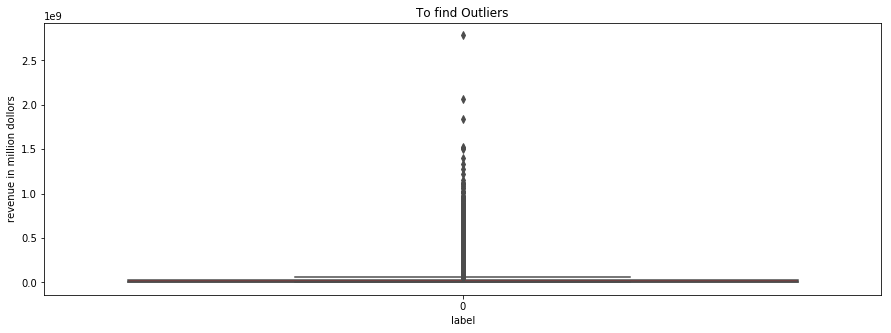

In [18]:
#plotting boxplot for revenue to see the frequency of outliers
plt.figure(figsize=(15,5))
sns.boxplot(
    data=df_tmdb['revenue'],
    color='red')
plt.ylabel('revenue in million dollors')
plt.xlabel('label')
plt.title('To find Outliers')
plt.show()

with boxplot we can analyse that there is significant number of outliers and droping all of them will reduce our scope of analysis. therfore we will try to sort this problem with statistical models

In [19]:
#calculating outlier i.e 0 in revenue column
df_tmdb[df_tmdb['revenue']==0].count()['id']

5888

In [20]:
#replace function is used to make 0 to NAN value and further dealing with nan values will be easy
df_tmdb=df_tmdb.replace(0,np.NaN)

In [21]:
#fill all the value of nan with mean()
df_tmdb.fillna(df_tmdb.mean())

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,1.500000e+08,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015
1,76341,28.419936,1.500000e+08,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015
2,262500,13.112507,1.100000e+08,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015
3,140607,11.173104,2.000000e+08,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015
4,168259,9.335014,1.900000e+08,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,2015-04-01,2947,7.3,2015
5,281957,9.110700,1.350000e+08,5.329505e+08,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156.0,Western|Drama|Adventure|Thriller,2015-12-25,3929,7.2,2015
6,87101,8.654359,1.550000e+08,4.406035e+08,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125.0,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
7,286217,7.667400,1.080000e+08,5.953803e+08,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141.0,Drama|Adventure|Science Fiction,2015-09-30,4572,7.6,2015
8,211672,7.404165,7.400000e+07,1.156731e+09,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91.0,Family|Animation|Adventure|Comedy,2015-06-17,2893,6.5,2015
9,150540,6.326804,1.750000e+08,8.537086e+08,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94.0,Comedy|Animation|Family,2015-06-09,3935,8.0,2015


So we are done with all the introduction and data wrangling process the next step is Exploratory Data Analysis(EDA).In this section we will try to analyse our clean data with few questions.

# 3.Exploratory Data Analysis

### Research Question 1:Find the movie name which has highest runtime?

In [58]:
#using function to DRY:Do not repeat 
def max_function(column_name):
    return df_tmdb[column_name].max()

In [59]:
#using function for 'runtime'
max_function('runtime')

900.0

In [23]:
#now find out the movie name  coresposnding to maximum runtime value
df_tmdb[df_tmdb['runtime']==max_runtime]['original_title']

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

### Research Question 2: How many movies have runtime less than 2hrs.(120 min) and greater than 2hrs ?

In [84]:
#greater_function is used to calculate greater values while comparing with other data
def greater_function(column_name,value):
    return df_tmdb[df_tmdb[column_name]>value].count()['id']

In [85]:
#apply on rruntime column
greater_function('runtime',120)

1569

In [86]:
#lessfunction is used to calculate lesser or equal to given values while comparing with other data
def less_function(column_name,value):
    return df_tmdb[df_tmdb[column_name]<=value].count()['id']

In [87]:
#applied on runtime column
less_function('runtime',120)

9134

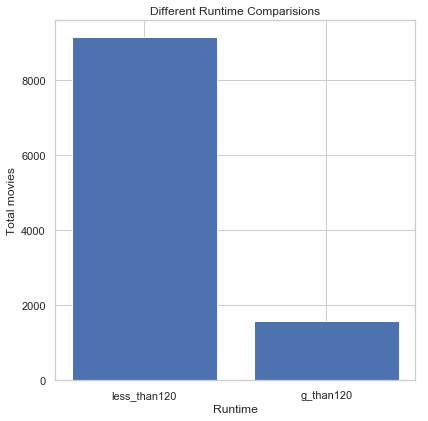

In [88]:
#visualizing and comparing the length of the movie using bar graph
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
length = ['less_than120', 'g_than120']
counts = [less_function('runtime',120),greater_function('runtime',120)]
ax.bar(length,counts)
plt.title('Different Runtime Comparisions')
plt.xlabel('Runtime')
plt.ylabel('Total movies')
plt.show()

we can observe that the movies having less than or equal to 120 min is the standard movie runtime

### Research Question 3: Year of highest and lowest number of movie release?

In [27]:
#Groupby fucntion is used to get yearwise movie release
highest=df_tmdb.groupby('release_year').count()['id']
print(highest.head())

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
Name: id, dtype: int64


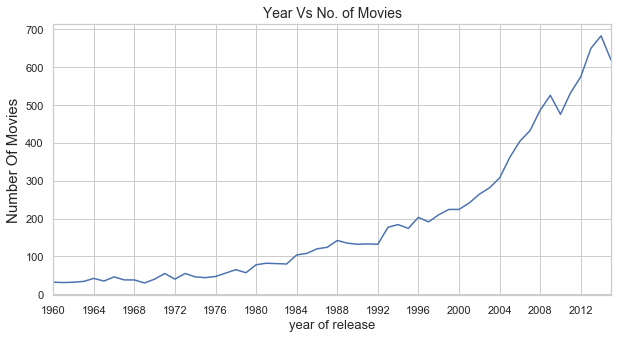

In [71]:
#visualizing the comparision
highest.plot(xticks = np.arange(1960,2016,4))
sns.set(rc={'figure.figsize':(10,5)})
plt.title("Year Vs No. of Movies",fontsize = 14)
plt.xlabel('year of release',fontsize = 13)
plt.ylabel('Number Of Movies',fontsize = 15)
sns.set_style("whitegrid")

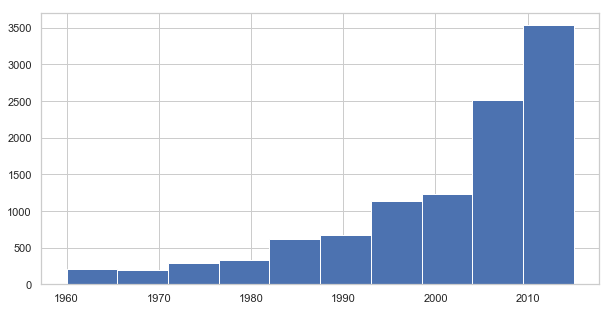

In [72]:
#analysis of release year using histogram
df_tmdb['release_year'].hist()
plt.show()

Year 1961 has 31(lowest) and 2014 has 700(highest) numbers of movie released.

The trend shows that the release of movies every year is inceasing.

### Research Question 4: Get 5 directors with highest directed movies?

In [29]:
#using groupby fucntion to count the total number of movies directed by each director
#using sort_values fucntion to sort in descending order
director_name=df_tmdb.groupby('director')['id'].count().sort_values(ascending=False).iloc[:5]

In [30]:
#getting top 5 directors with directed movies
print(director_name)

director
Woody Allen         45
Clint Eastwood      34
Steven Spielberg    29
Martin Scorsese     28
Ridley Scott        23
Name: id, dtype: int64


### Research Question 5: What  is maximum and minimum vote average?

In [60]:
#max_funtion is used to calculate the maximum of vote average
print("maximum vote average:",max_function('vote_average'))

maximum vote average: 9.2


In [61]:
#a min_func function is made to calculate the minimum value
def min_function(column_name):
    return df_tmdb[column_name].min()

In [62]:
print("minimum vote average:",min_function('vote_average'))

minimum vote average: 1.5


### Research Question 6: Name the movies with maximum and minimum vote average?

In [74]:
#movie having maximum vote average
df_tmdb[df_tmdb['vote_average']==max_function('vote_average')]['original_title']

3894    The Story of Film: An Odyssey
Name: original_title, dtype: object

In [75]:
#movies with minimum vote average
df_tmdb[df_tmdb['vote_average']==min_function('vote_average')]['original_title']

7772                Transmorphers
10865    Manos: The Hands of Fate
Name: original_title, dtype: object

There are two movies which have same minimum rating(1.5)

### Research Question 7:Movies having vote average less than or equal to 5 and greater than 5?

In [91]:
#Movies vote average greater than 5
print("Number of Movies with rating greater than 5:",greater_function('vote_average',5))

Number of Movies with rating greater than 5: 9099


In [92]:
#Movies vote average less than or equal to 5
print("Number of Movies with rating less than or equal to 5:",less_function('vote_average',5))

Number of Movies with rating less than or equal to 5: 1632


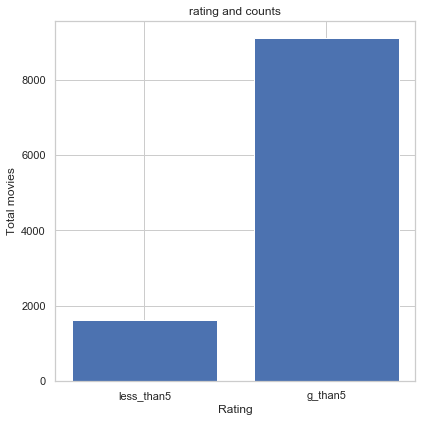

In [93]:
#visualizing the rating less than or equal to 5 and greater than 5
fig = plt.figure()
ax = fig.add_axes([0,0,0.5,1])
Number = ['less_than5', 'g_than5']
counts = [less_function('vote_average',5),greater_function('vote_average',5)]
ax.bar(Number,counts)
plt.title('rating and counts')
plt.xlabel('Rating')
plt.ylabel('Total movies')
plt.show()

Movies with rating greater than 5 has frequency higher than movies rating less than or equal to 5. It shows that directors are well aware of delivering quality content among the audience

### Research Question 8: What is the vote average of most popular movie?

In [63]:
#get the vote average of popular movie
df_tmdb[df_tmdb['popularity']==max_function('popularity')]['vote_average']

0    6.5
Name: vote_average, dtype: float64

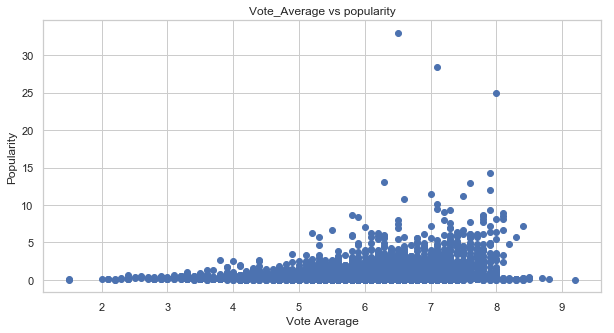

In [64]:
#visualizing the data using scatter plot
x = df_tmdb['vote_average']
y = df_tmdb['popularity']

plt.scatter(x, y)
plt.xlabel("Vote Average")
plt.ylabel("Popularity")
plt.title("Vote_Average vs popularity")
plt.show()

Movies having rating greater than 5 seems to be very popular

### Research Question 9: Find the revenue of highest budget movie?

In [66]:
#getting revenue of highest budget movie
df_tmdb[df_tmdb['budget']==max_function('budget')]['revenue']

2244    11087569.0
Name: revenue, dtype: float64

### Research Question 10: Revenue of Most Popular movie?

In [68]:
#get revenue of most popular movie
df_tmdb[df_tmdb['popularity']==max_function('popularity')]['revenue']

0    1.513529e+09
Name: revenue, dtype: float64

# 4.Conclusions

1. The movie 'The Story of Film: An Odyssey' has runtime 900 min.This is because many parts are counted together.

2. Movie length less than or equal to 2hrs is the ideal length for production.

3. Year 1961 has 31(lowest) and 2014 has 700(highest) numbers of movie released. This is because of evolution in technologies and public demand has raised the production of more movies year to year 

4. According to dataset Woody Allen has directed maximum movies (45) so far.

5. The Story of Film: An Odyssey has the maximum vote average (9.2) whereas Transmorphers and  Manos: The Hands of Fate has the lowest rating(1.5). It shows that people are interested in quality content.

6. Most popular movie has the rating 6.5 and revenue earned is 1513528810($).

7. Movie with highest budget had earned (11087569)($).

#### Limitations

 1.This study has limitations of dealing with NaN values.It affects the process of data analysis.
 NAN values limit our scope of exploration when they are in significant amount.
 Sometimes deleting all these makes our data monotonous.
 
 2.The data given to us was sufficient but columns containing outliers made the analysis less interesting. 
 
 This is how i conclude my General Data analysis of Movie data set!